In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Walmart.csv")
df.head()

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Describing Dataset df**

In [ ]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

**Checking Null or Missing Values In Dataset df**

In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Checking Outliers**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

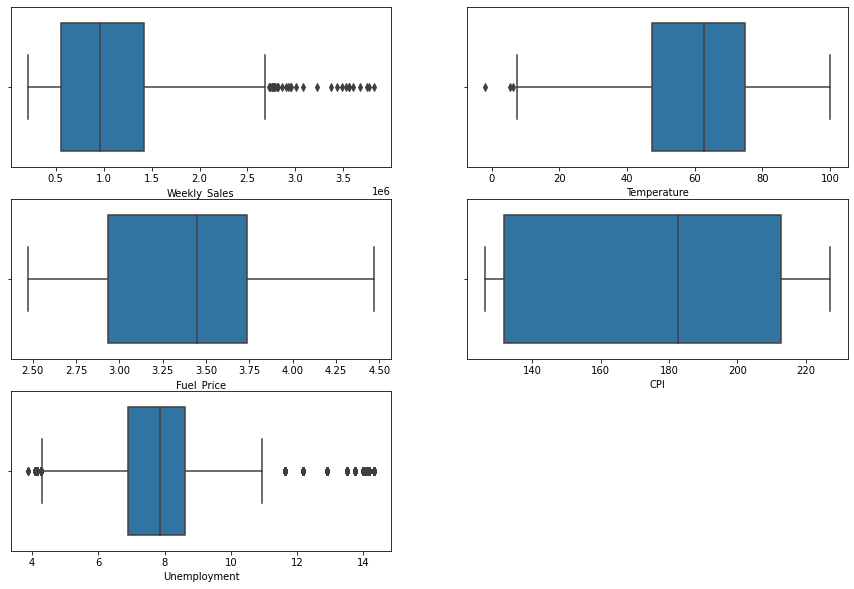

In [ ]:
#checking outliers with the help of Boxplot

pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(df[i]);
            plt.xlabel(i);


we can see here that 3 columns "Weekly sale" , "Temperature" and "Unemployment has outliers.

**Treating Outliers**

In [ ]:
#treating outliers with the help of upper whisker and lower whisker.

def outlier_treatment():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(df[i]);
            plt.xlabel(i);

# <center> 2. Exploratory Data Analysis (EDA)

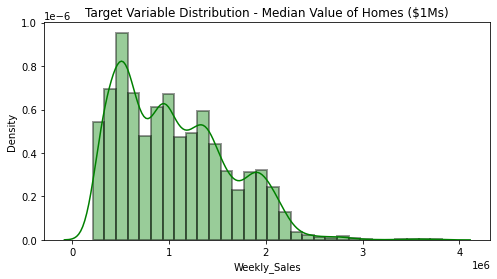

In [ ]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around 20 units.

                               Visualising Categorical Features:                                


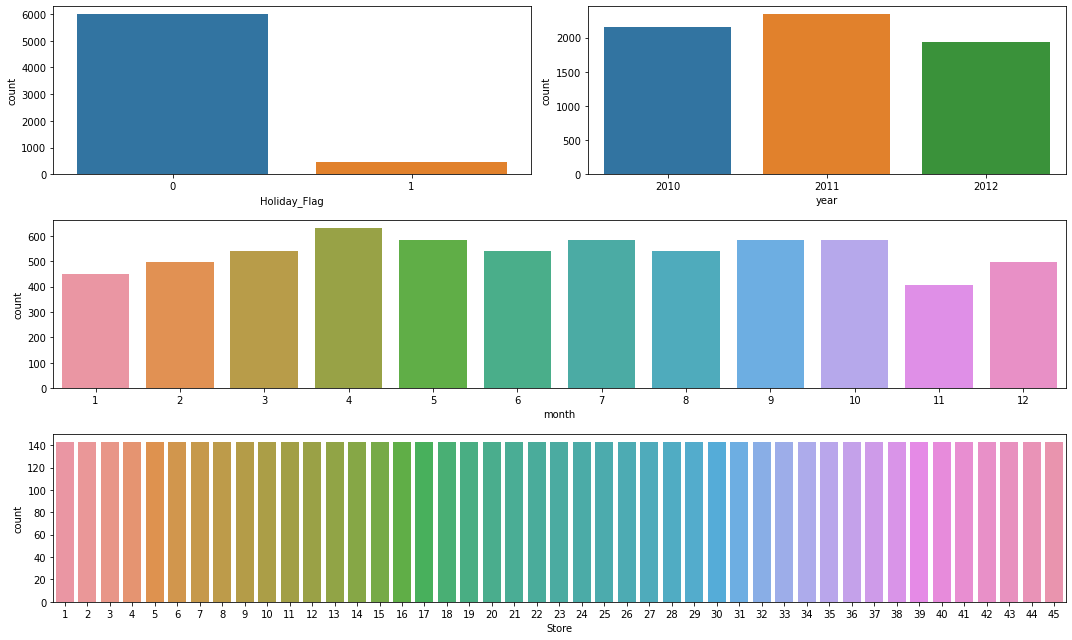

In [ ]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

**Inference:** There are no categorical features in the dataset.

                                                Numeric Features Distribution                                                 


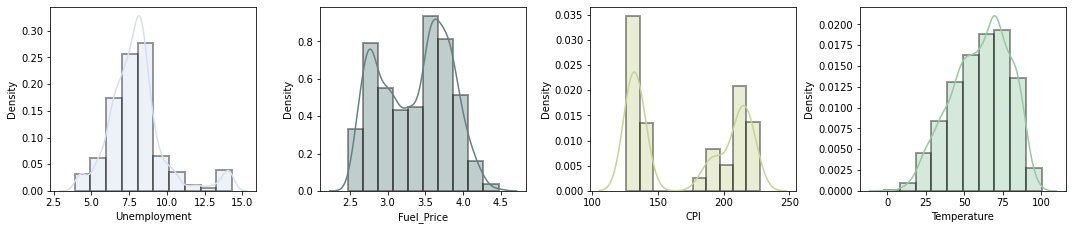

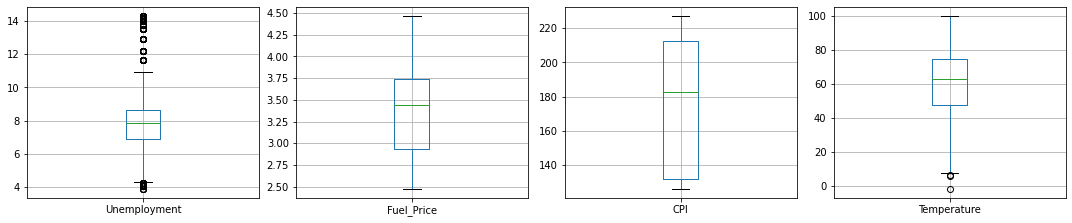

In [ ]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

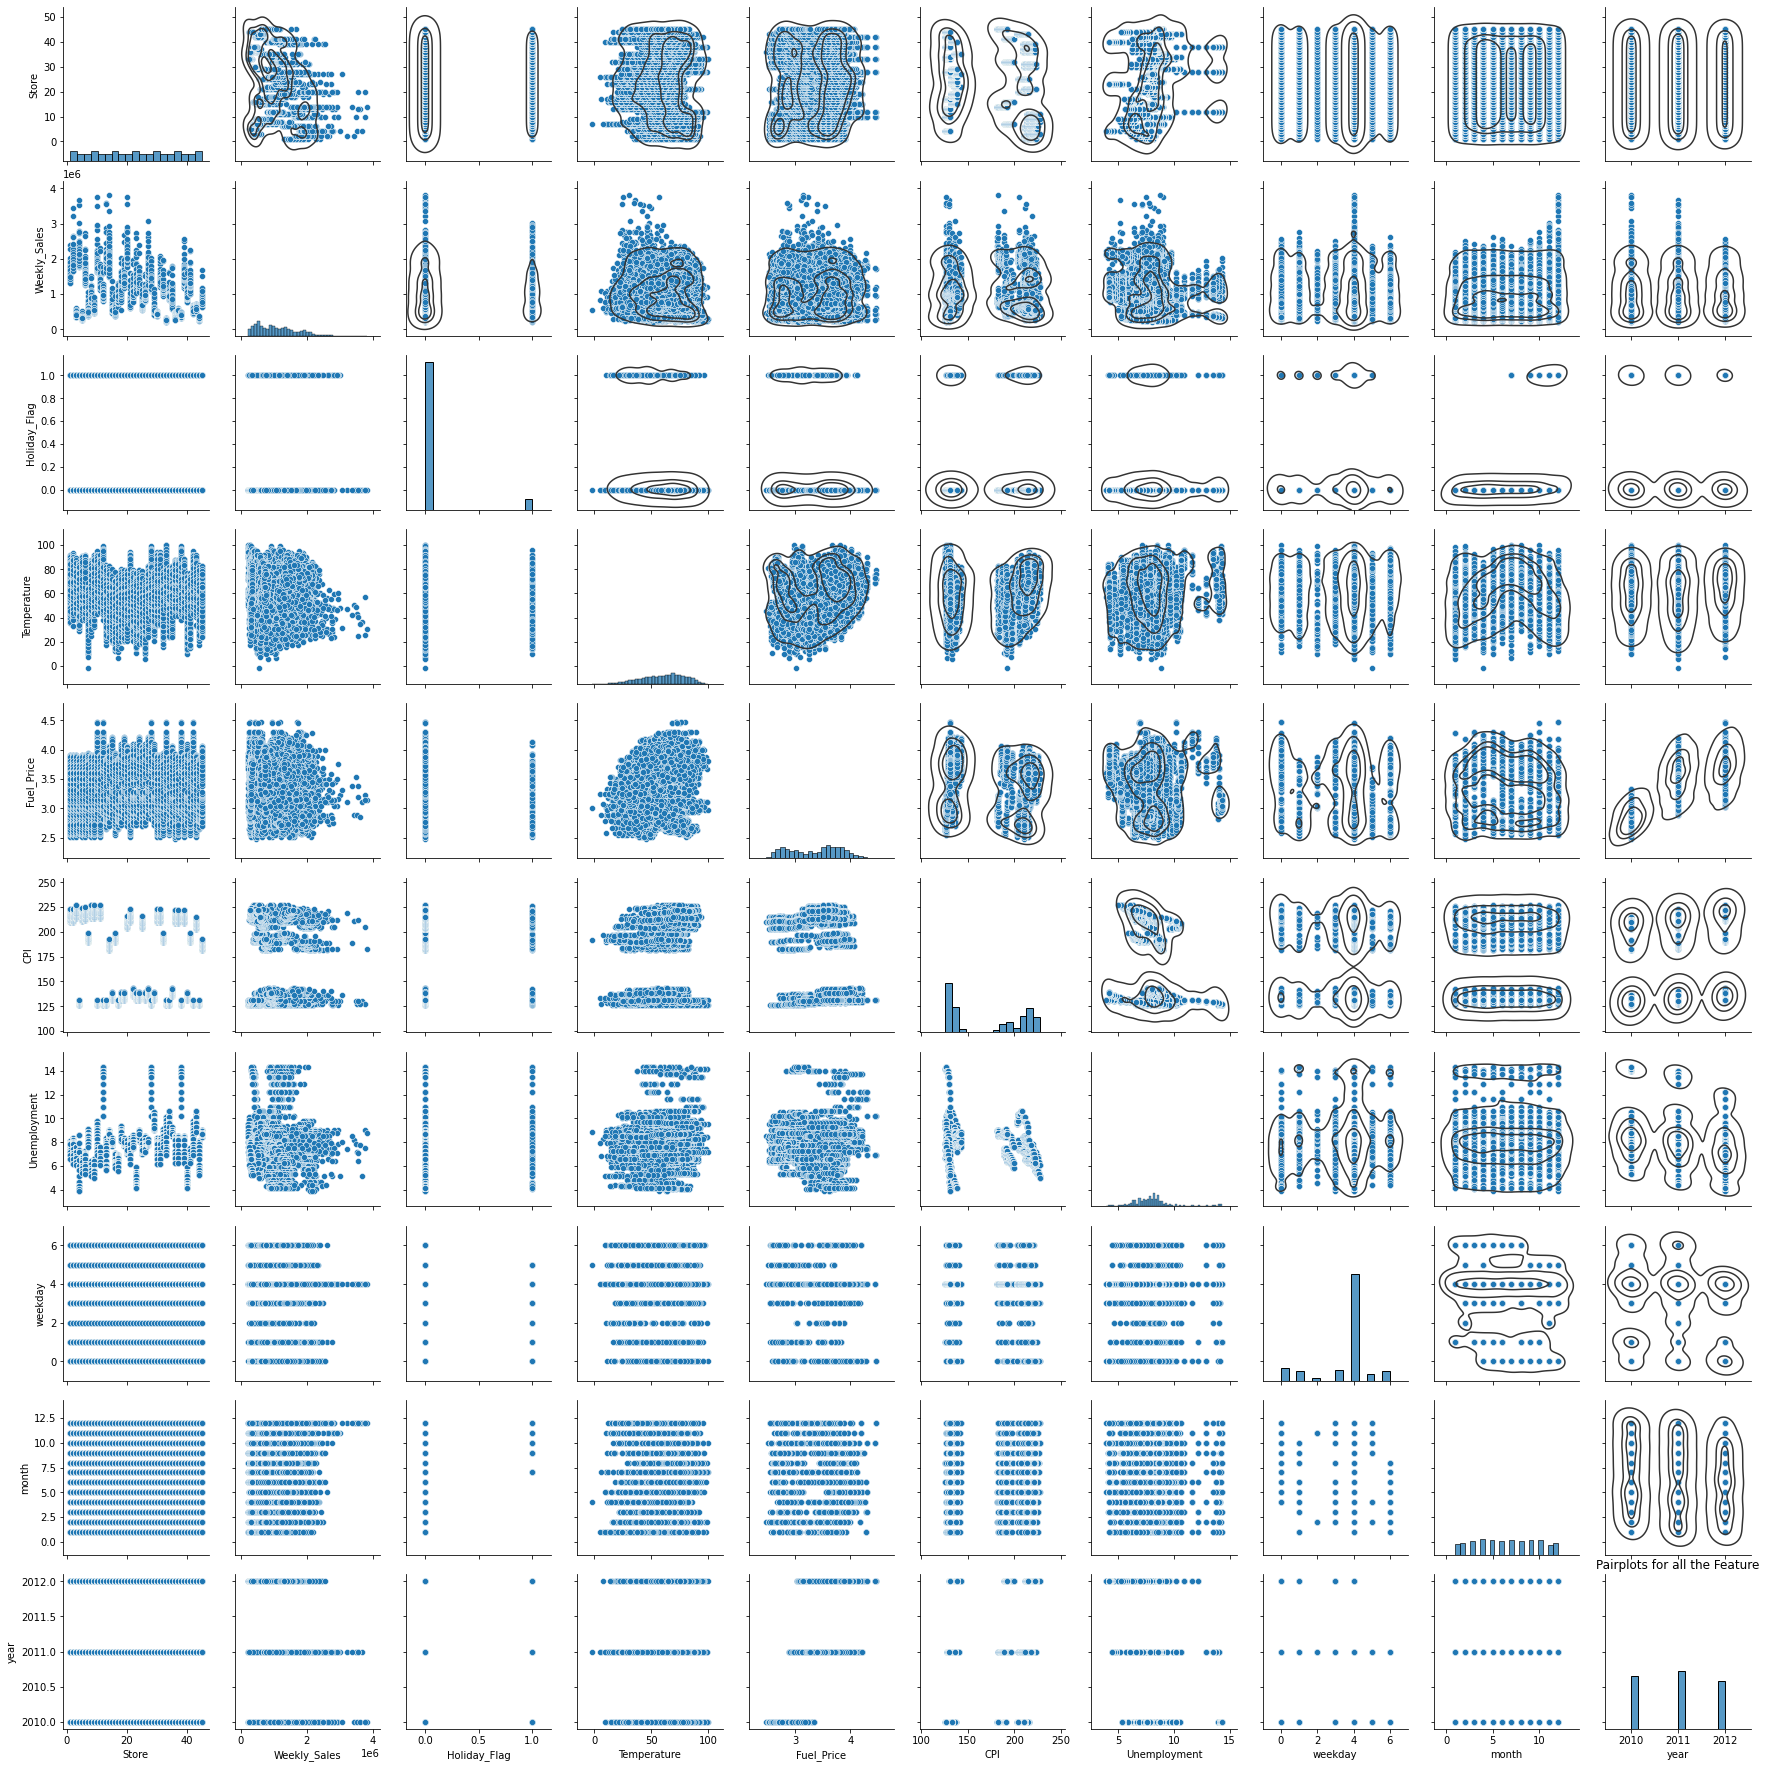

In [ ]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

# Line Plot Of Features

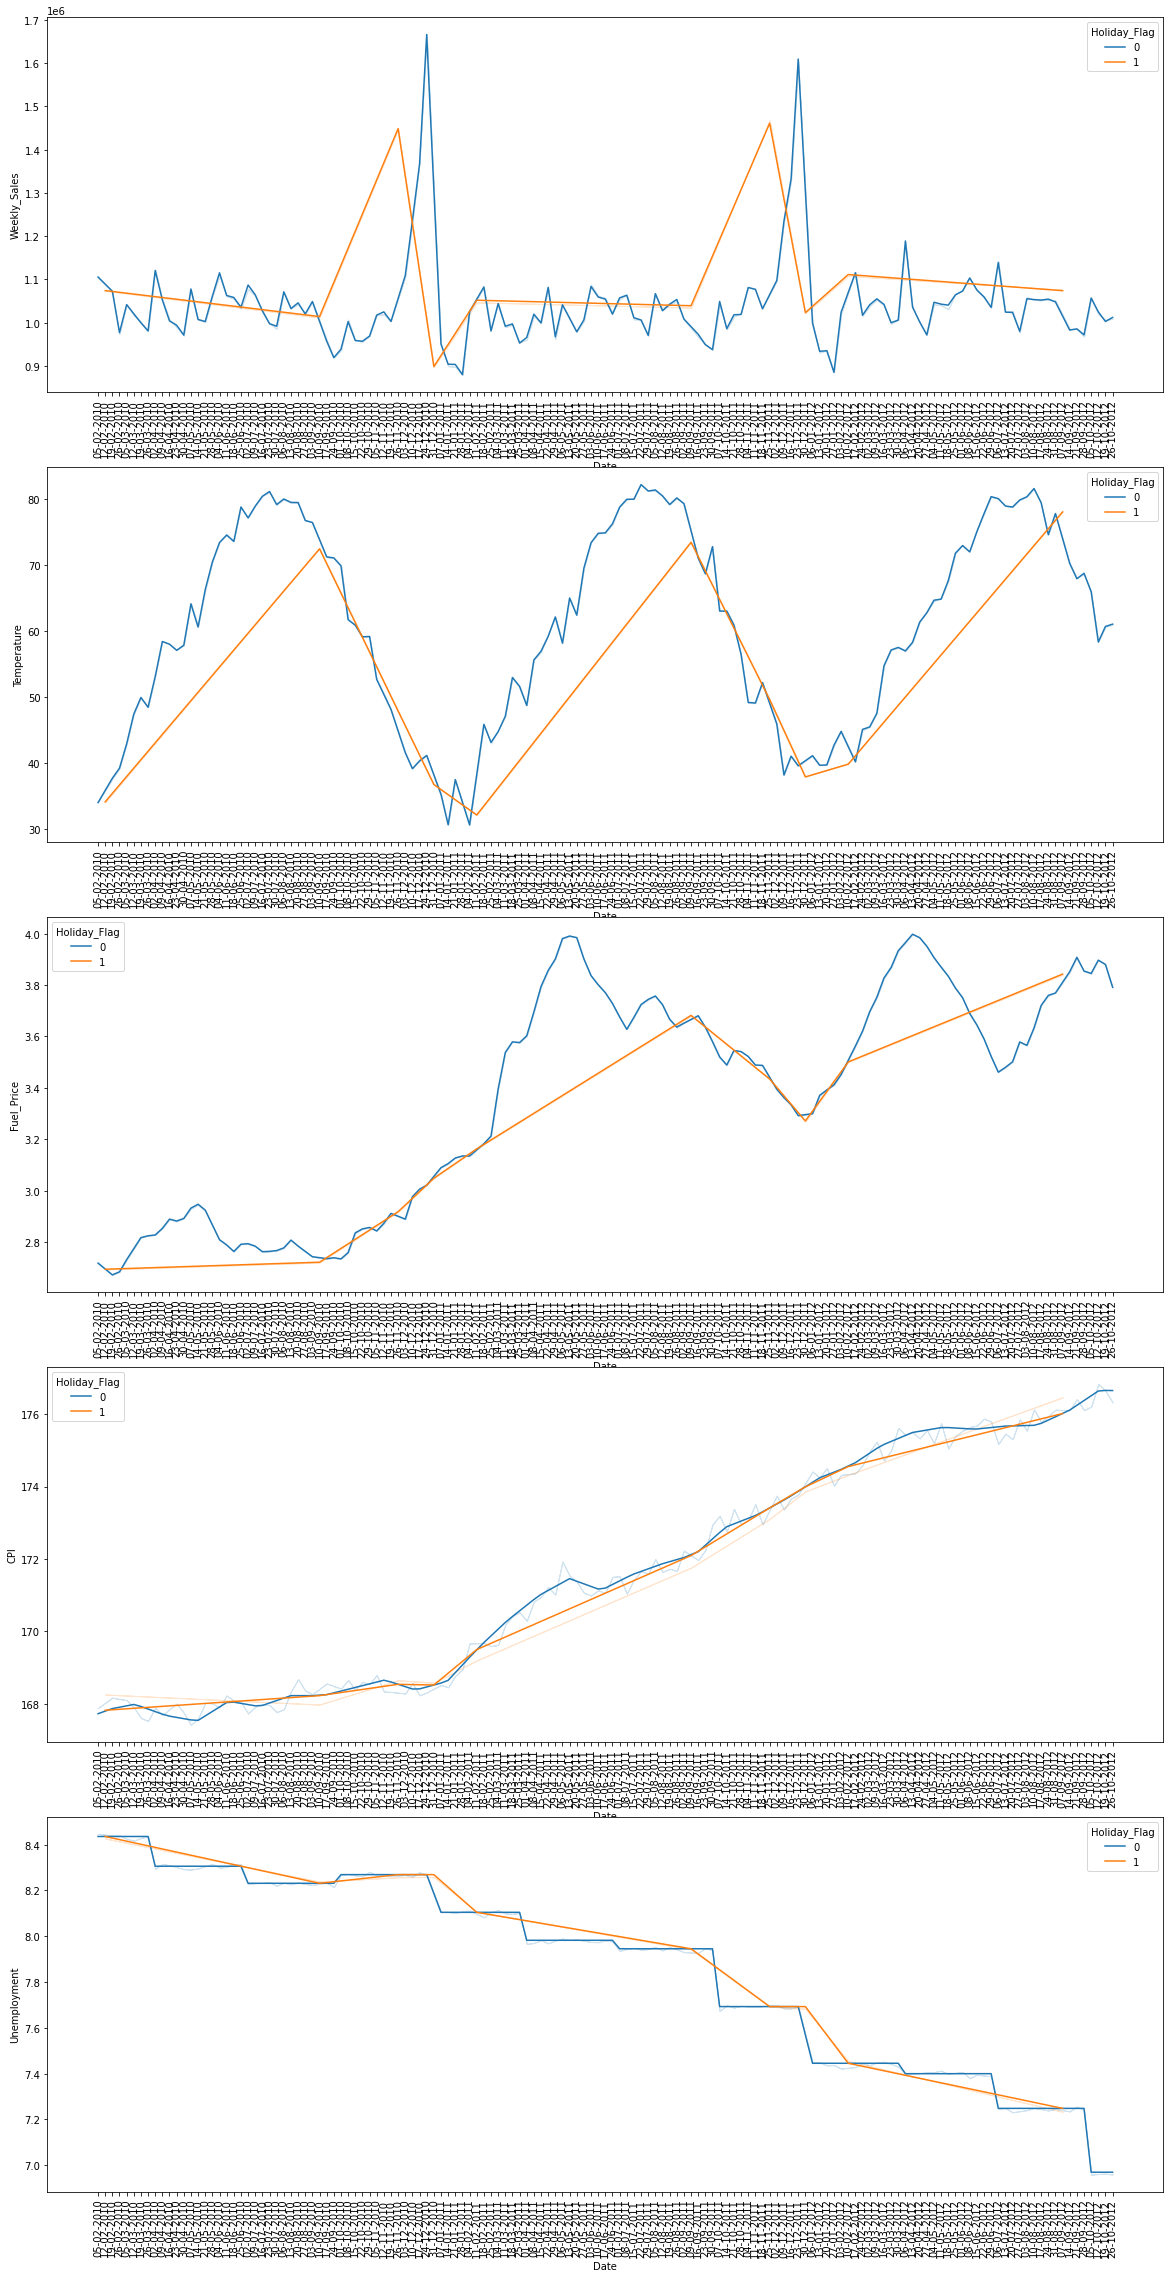

In [ ]:
pno = 1
plt.figure(figsize=(20,40))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(5,1,pno)
            ax = sns.lineplot(data = df , x = "Date" ,y = i  , hue = df.Holiday_Flag , ci = False );
            plt.xticks(rotation = 90)
            pno+=1
            

# Bar Plot Of Features  

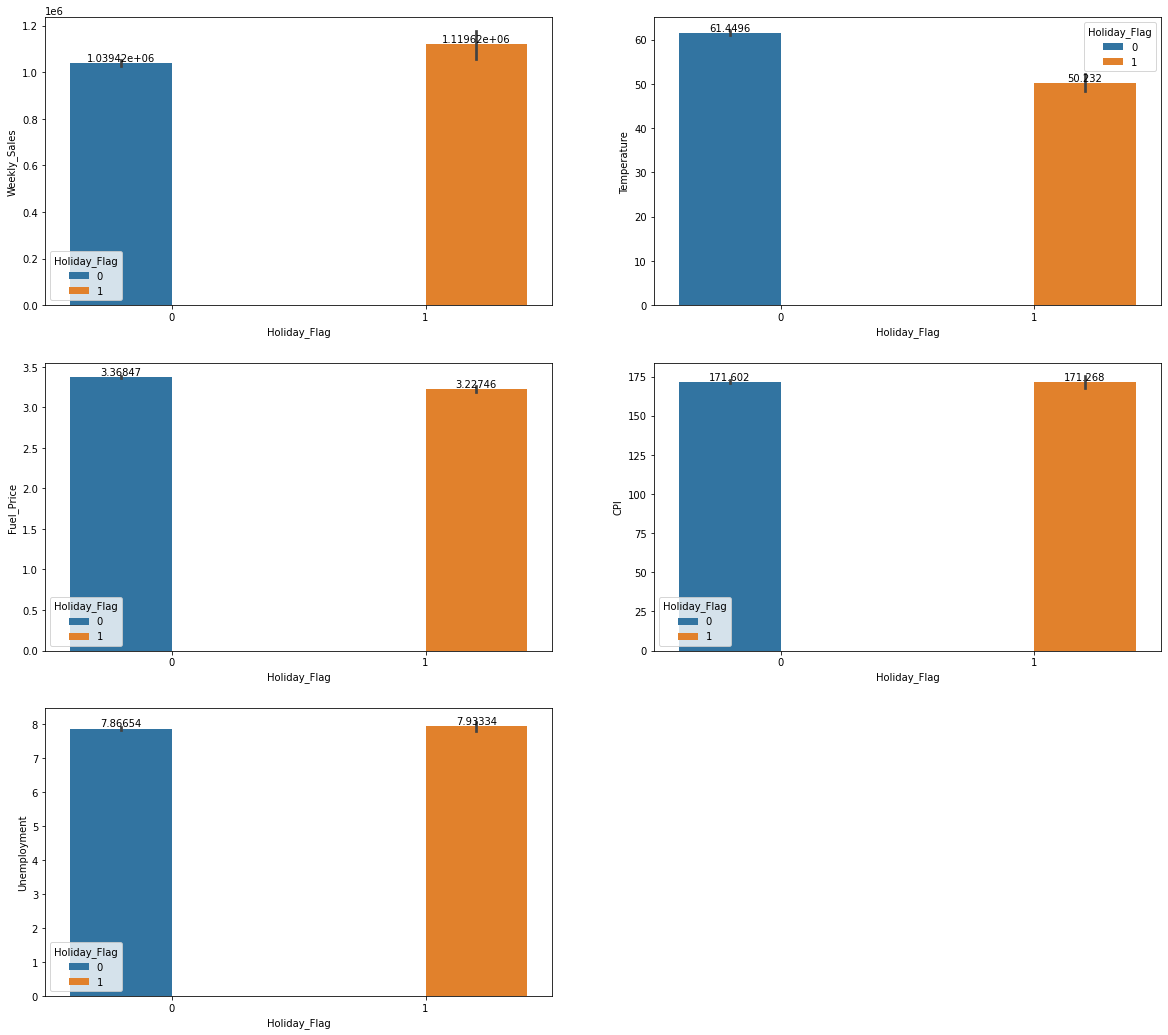

In [ ]:
from numpy import mean

pno = 1
plt.figure(figsize=(20,18))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno)
            ax = sns.barplot(data = df , x = "Holiday_Flag" ,y = i  , hue = df.Holiday_Flag ,estimator=mean);
            pno+=1
            
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

In [ ]:
#Droping Date Column 

df.drop(columns="Date" , inplace = True)

# Pairplot Of Features

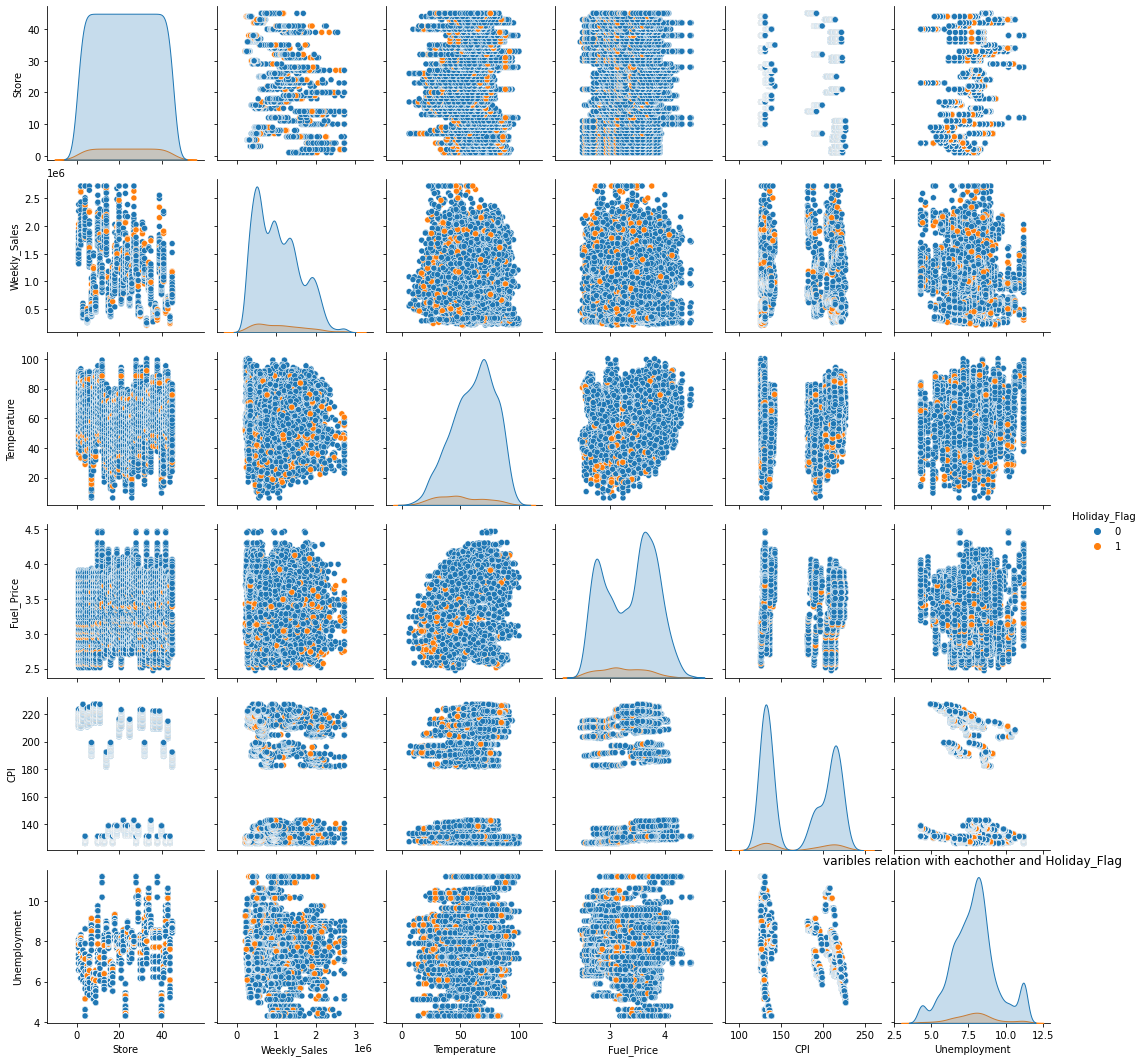

In [ ]:
# variables relation with "Holiday_Flag"

sns.pairplot(df , hue = "Holiday_Flag" );
plt.title("varibles relation with eachother and Holiday_Flag");

# Checking Correlation Among Features

**Checking Correlation**

In [ ]:
df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.336559 -4.386841e-16    -0.022749   
Weekly_Sales -3.365589e-01      1.000000  3.670284e-02    -0.060808   
Holiday_Flag -4.386841e-16      0.036703  1.000000e+00    -0.155149   
Temperature  -2.274937e-02     -0.060808 -1.551494e-01     1.000000   
Fuel_Price    6.002295e-02      0.010998 -7.834652e-02     0.144962   
CPI          -2.094919e-01     -0.072627 -2.162091e-03     0.176960   
Unemployment  2.559643e-01     -0.108662  1.120376e-02     0.088315   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.255964  
Weekly_Sales    0.010998 -0.072627     -0.108662  
Holiday_Flag   -0.078347 -0.002162      0.011204  
Temperature     0.144962  0.176960      0.088315  
Fuel_Price      1.000000 -0.170642     -0.053428  
CPI            -0.170642  1.000000     -0.278542  
Unemployment   -0.053428 -0.278542      1.000000

**Heatmap of Correlation**

Text(0.5, 1.0, 'correlation of feature')

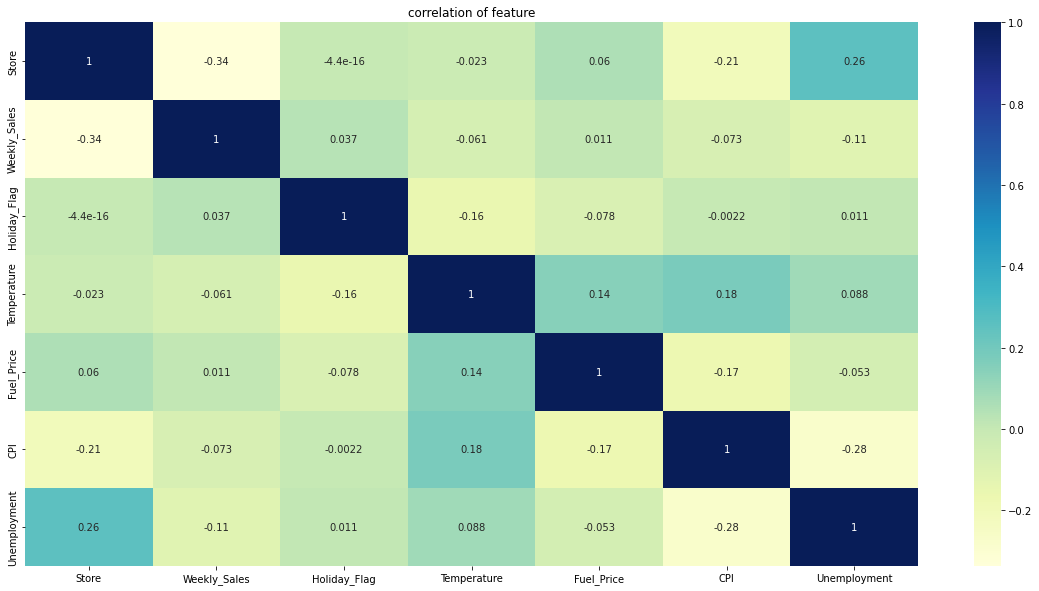

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True , cmap ="YlGnBu")
plt.title("correlation of feature")

# Deeper Look in Sales

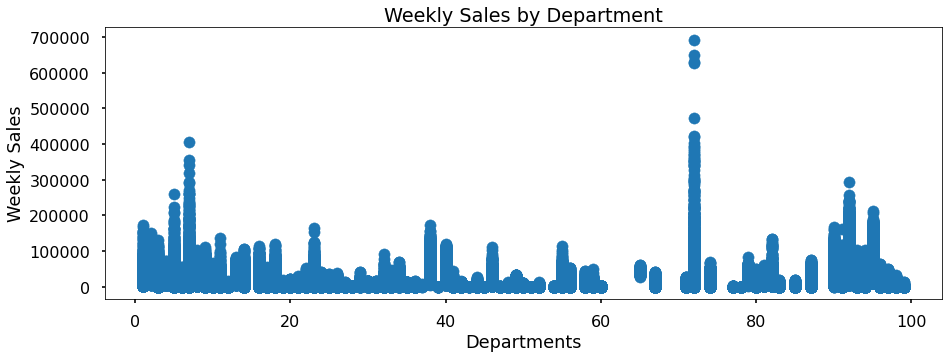

In [ ]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

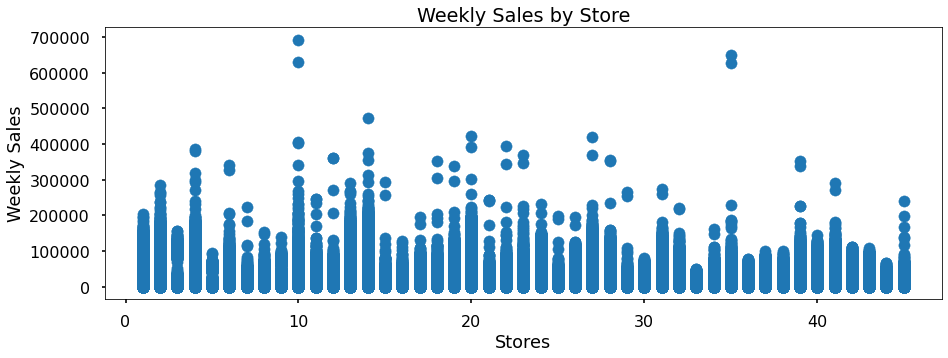

In [ ]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

# Plotting Sales

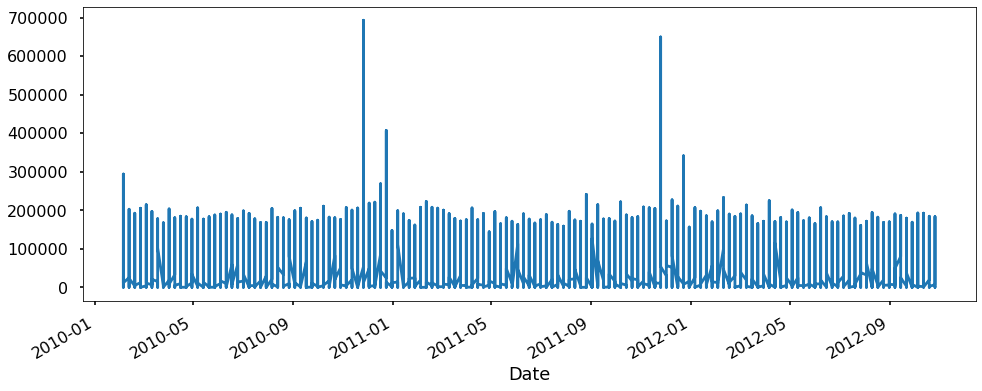

In [ ]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

In [ ]:
df_week = df.resample('W').mean() #resample data as weekly

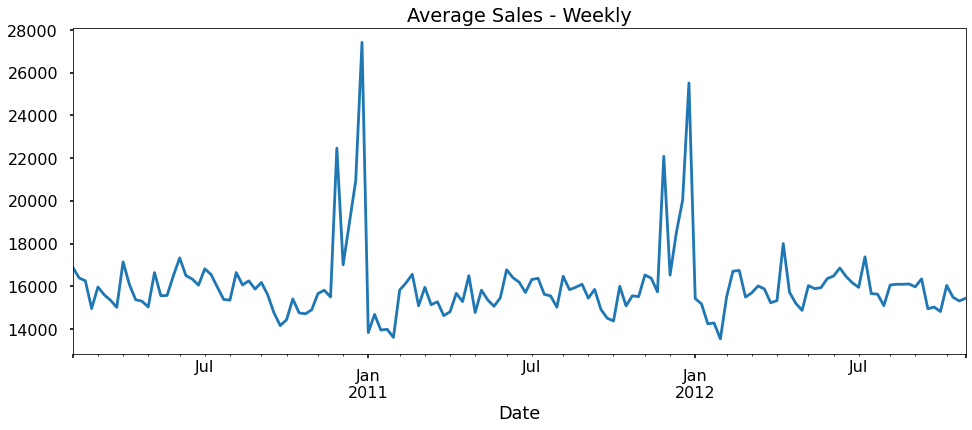

In [ ]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

In [ ]:
df_month = df.resample('MS').mean() # resampling as monthly

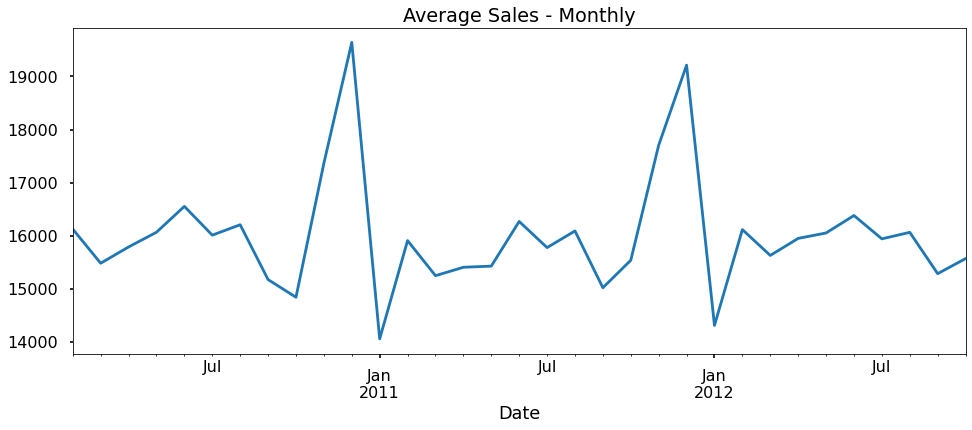

In [ ]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

When I turned data to monthly, I realized that I lost some patterns in weekly data. So, I will continue with weekly resampled data.

# To Observe 2-weeks Rolling Mean and Std

My data is non-stationary. So, I will try to find more stationary version on it. 

In [ ]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

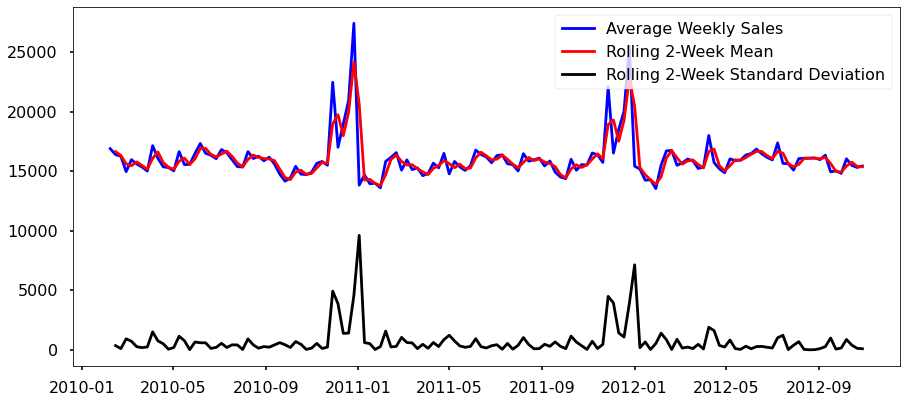

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

# Changing Date to Datetime and Creating New Columns

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [ ]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

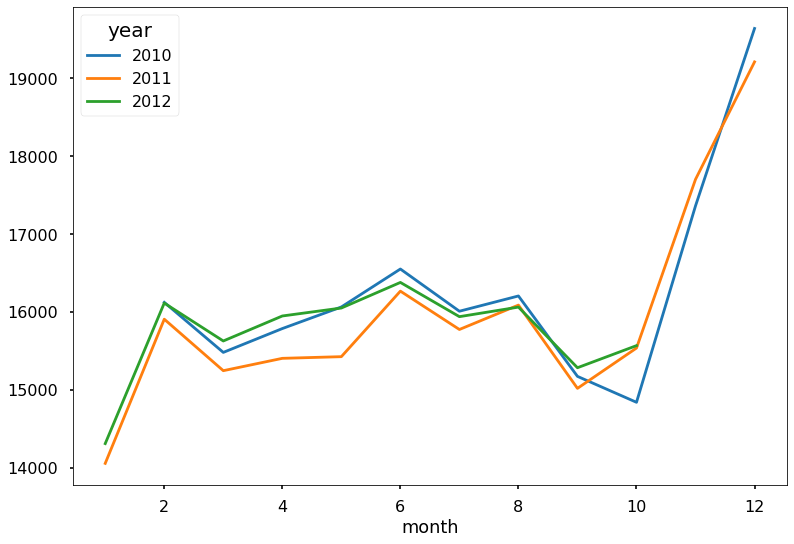

In [ ]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

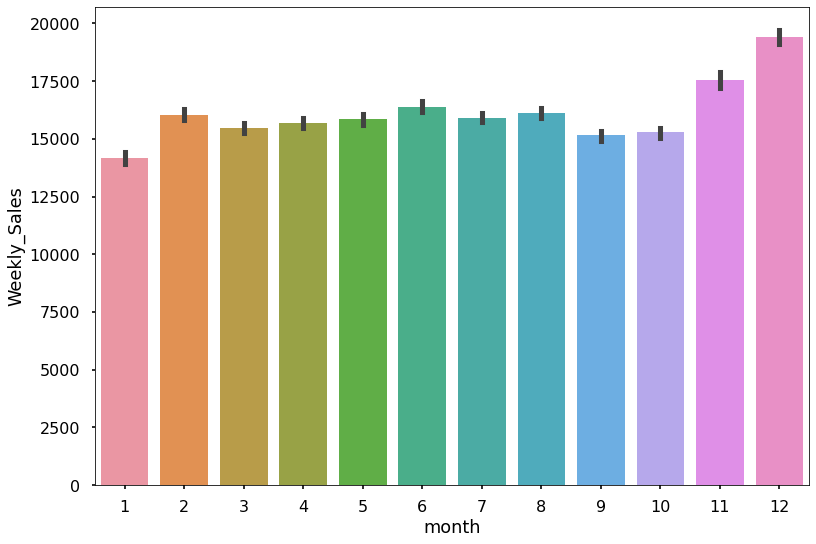

In [ ]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value.

In [ ]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed. 

<AxesSubplot:xlabel='week'>

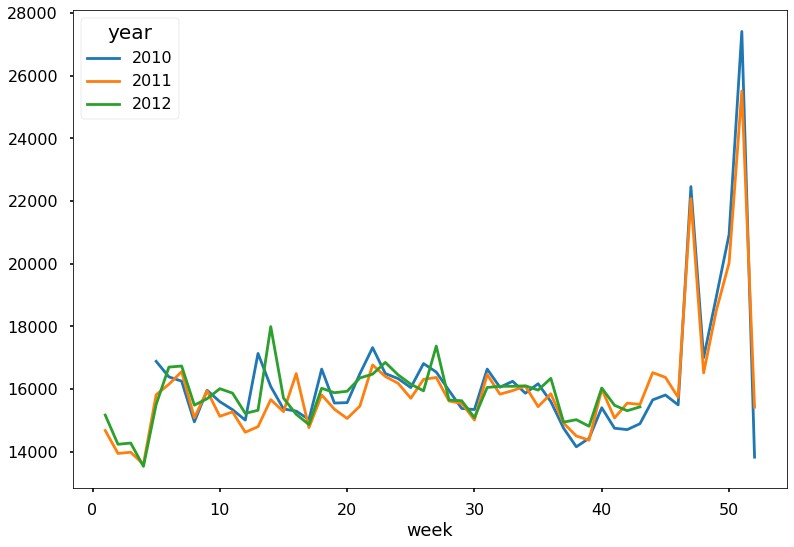

In [ ]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

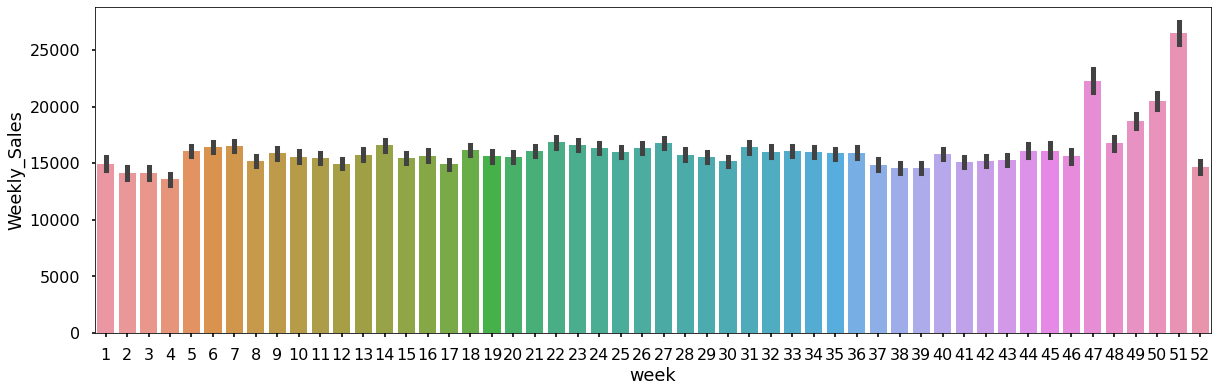

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

# Scaling Data For Machine Learning

In [ ]:
x = df.drop(columns="Weekly_Sales")
y = df["Weekly_Sales"]

In [ ]:
#importing Standard Scaler

from sklearn.preprocessing import StandardScaler  

In [ ]:
st = StandardScaler()

In [ ]:
x_scaled = st.fit_transform(x)

# Spliting Data in Train Test 


In [ ]:
#importing train test split to split data

from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y , test_size=0.09 , random_state = 123)

In [ ]:
x_train.shape

(5855, 6)

In [ ]:
#importing various regressor's 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error

# KNN Regression

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.6944028081646474

In [ ]:
mean_squared_error(y_test,y_pred)

94777187750.89906

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr =  DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
Y_PPred = dtr.predict(x_test)

In [ ]:
r2_score(y_test , Y_PPred)

0.898114933237929

In [ ]:
mean_squared_error(y_test , Y_PPred)

31598392784.722595

In [ ]:
#importing Plot tree to plot Decision Tree 

from sklearn.tree import plot_tree

**plotting Decision Tree**

In [ ]:
#a = plot_tree(dtr, filled = True);
#a

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=100,learning_rate=1)
GBR.fit(x_train , y_train)

GradientBoostingRegressor(learning_rate=1)

In [ ]:
Y_PRED = GBR.predict(x_test)

In [ ]:
r2_score(y_test , Y_PRED)

0.9367820970048719

In [ ]:
mean_squared_error(y_test , Y_PRED)

19606250389.28859

# Feature Importance

In [ ]:
x_train = pd.DataFrame(x_train , columns = ["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment"])

In [ ]:
feature_imp = pd.Series(dtr.feature_importances_,
                        index = x_train.columns).sort_values(ascending=False)
feature_imp*100

Store           74.914991
CPI             13.998129
Unemployment     7.117858
Temperature      2.049700
Fuel_Price       1.616343
Holiday_Flag     0.302979
dtype: float64

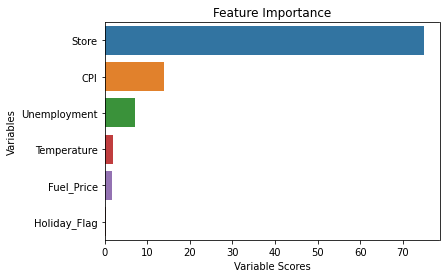

In [ ]:
sns.barplot(x= feature_imp*100, y = feature_imp.index)
plt.xlabel("Variable Scores")
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

# <center> 6. Predictive Modelling

In [ ]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

## Objective: 
Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


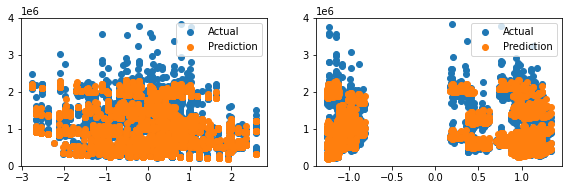



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9276826744775732
Residual Sum of Squares (RSS) on Training set  ---> 111450847994430.22
Mean Squared Error (MSE) on Training set       ---> 23404209994.630455
Root Mean Squared Error (RMSE) on Training set ---> 152984.3455868294

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.927676279121959
Residual Sum of Squares (RSS) on Training set  ---> 29463185193746.86
Mean Squared Error (MSE) on Training set       ---> 24738190758.813484
Root Mean Squared Error (RMSE) on Training set ---> 157283.79051514965

--------------------Residual Plots--------------------


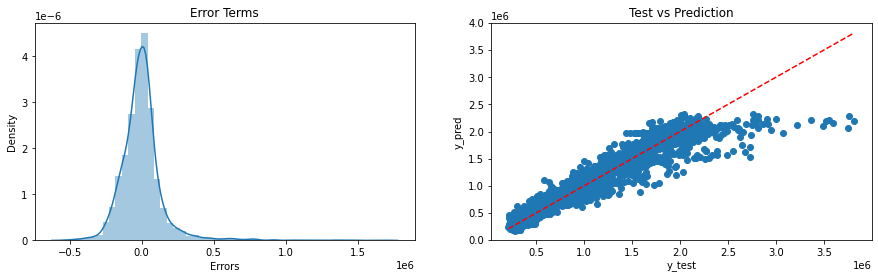

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


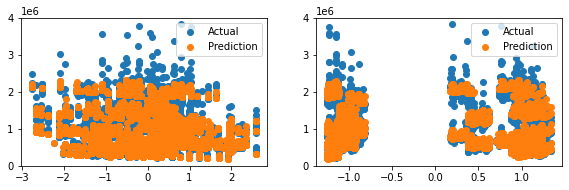



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9276821973327432
Residual Sum of Squares (RSS) on Training set  ---> 111451583339598.72
Mean Squared Error (MSE) on Training set       ---> 23404364414.027447
Root Mean Squared Error (RMSE) on Training set ---> 152984.8502761873

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.927696636618113
Residual Sum of Squares (RSS) on Training set  ---> 29454891971661.734
Mean Squared Error (MSE) on Training set       ---> 24731227516.08878
Root Mean Squared Error (RMSE) on Training set ---> 157261.65303750554

--------------------Residual Plots--------------------


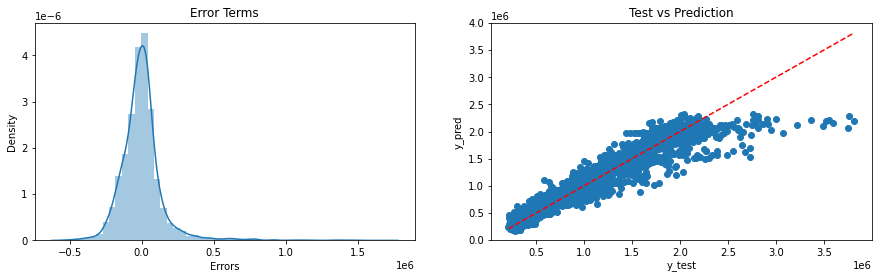

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


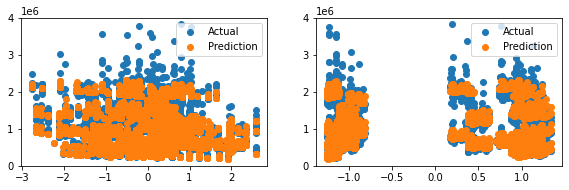



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9276826740433101
Residual Sum of Squares (RSS) on Training set  ---> 111450848663688.89
Mean Squared Error (MSE) on Training set       ---> 23404210135.171963
Root Mean Squared Error (RMSE) on Training set ---> 152984.3460461624

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9276767498337136
Residual Sum of Squares (RSS) on Training set  ---> 29462993435532.15
Mean Squared Error (MSE) on Training set       ---> 24738029752.75579
Root Mean Squared Error (RMSE) on Training set ---> 157283.27868135186

--------------------Residual Plots--------------------


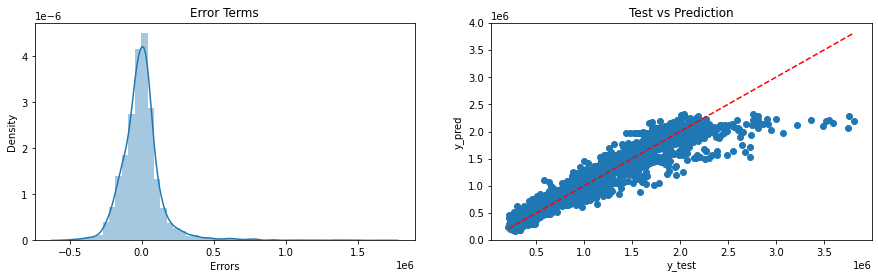

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


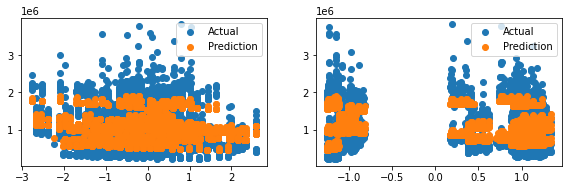



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7477826893125253
Residual Sum of Squares (RSS) on Training set  ---> 388701226876489.0
Mean Squared Error (MSE) on Training set       ---> 81625625131.56006
Root Mean Squared Error (RMSE) on Training set ---> 285701.9865726524

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7599512663907991
Residual Sum of Squares (RSS) on Training set  ---> 97790879783118.03
Mean Squared Error (MSE) on Training set       ---> 82108211404.80104
Root Mean Squared Error (RMSE) on Training set ---> 286545.3042797963

--------------------Residual Plots--------------------


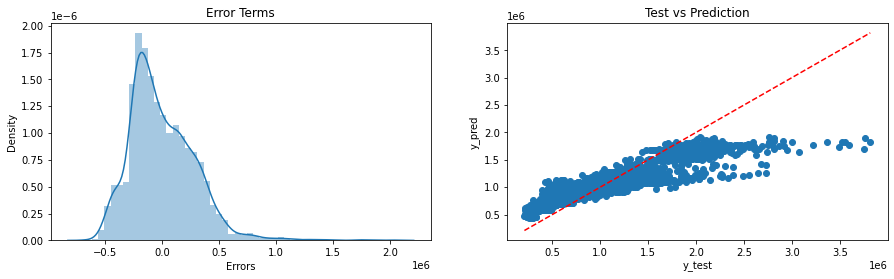

In [ ]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/pn.png" style="width: 500px;float: left;"/>

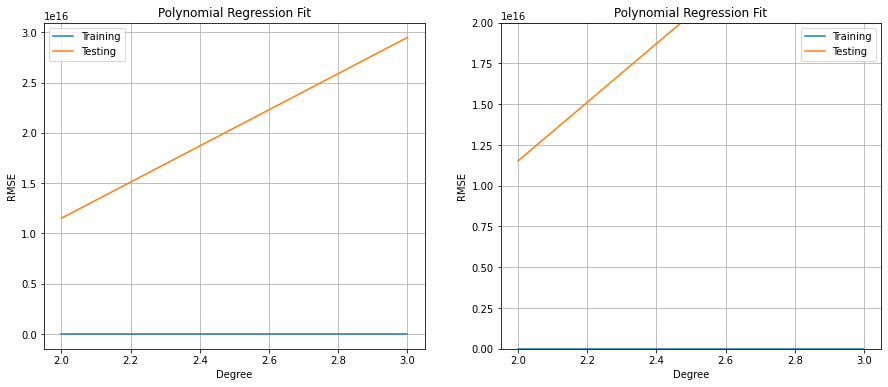

In [ ]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 382416.72707697  -87749.08819447  -33466.21811552  -70608.43596712
   23371.88280837   44272.12738693   67885.30758384 -171730.97447116
  194110.33061399 -182942.03065485  -95260.47050719 -110787.17299967
 -154257.07523525  200572.26744363  -27802.83358985   36027.35653929
  202356.39957846  137960.5727378  -126652.1156391    29819.45548371
   75864.89398192  119328.98106792  104372.22301835 -108321.57336704
   54083.53671998   65645.06638736  110781.93941655 -114111.68634244
   52174.80531825  169276.22877422   47325.81863416 -164944.63849199
  -45218.40228284   78308.2717848    42369.70043942 -163871.15661923
 -143446.53544316  -94113.42272716  -57253.08807135  -49965.33157002]
The Intercept of the Regresion Model was found to be  1047603.298112138


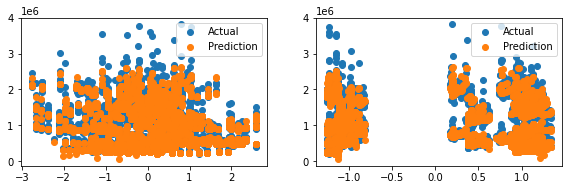



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.940476691273314
Residual Sum of Squares (RSS) on Training set  ---> 91733525612284.02
Mean Squared Error (MSE) on Training set       ---> 19263655105.477535
Root Mean Squared Error (RMSE) on Training set ---> 138793.57011575694

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -3.880366289092445e+20
Residual Sum of Squares (RSS) on Training set  ---> 1.5807808172355157e+35
Mean Squared Error (MSE) on Training set       ---> 1.3272718868476202e+32
Root Mean Squared Error (RMSE) on Training set ---> 1.1520728652509876e+16

--------------------Residual Plots--------------------


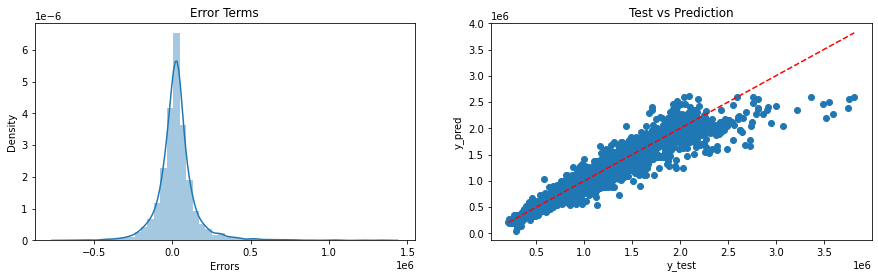

In [ ]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

Train-R2       Test-R2     Train-RSS  \
Multiple Linear Regression (MLR)  0.927683  9.276763e-01  1.114508e+14   
Ridge Linear Regression (RLR)     0.927682  9.276966e-01  1.114516e+14   
Lasso Linear Regression (LLR)     0.927683  9.276767e-01  1.114508e+14   
Elastic-Net Regression (ENR)      0.747783  7.599513e-01  3.887012e+14   
Polynomial Regression (PNR)       0.940477 -3.880366e+20  9.173353e+13   

                                      Test-RSS     Train-MSE      Test-MSE  \
Multiple Linear Regression (MLR)  2.946319e+13  2.340421e+10  2.473819e+10   
Ridge Linear Regression (RLR)     2.945489e+13  2.340436e+10  2.473123e+10   
Lasso Linear Regression (LLR)     2.946299e+13  2.340421e+10  2.473803e+10   
Elastic-Net Regression (ENR)      9.779088e+13  8.162563e+10  8.210821e+10   
Polynomial Regression (PNR)       1.580781e+35  1.926366e+10  1.327272e+32   

                                     Train-RMSE     Test-RMSE  
Multiple Linear Regression (MLR)  152984.345587  1.572838e+05  
Ridge Linear Regression (RLR)     152984.850276  1.572617e+05  
Lasso Linear Regression (LLR)     152984.346046  1.572833e+05  
Elastic-Net Regression (ENR)      285701.986573  2.865453e+05  
Polynomial Regression (PNR)       138793.570116  1.152073e+16

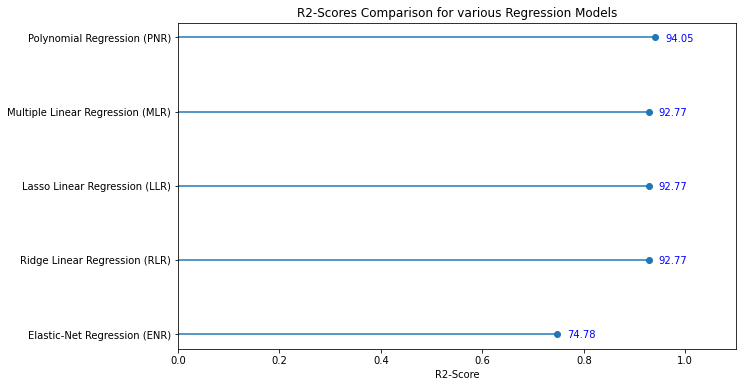

In [ ]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

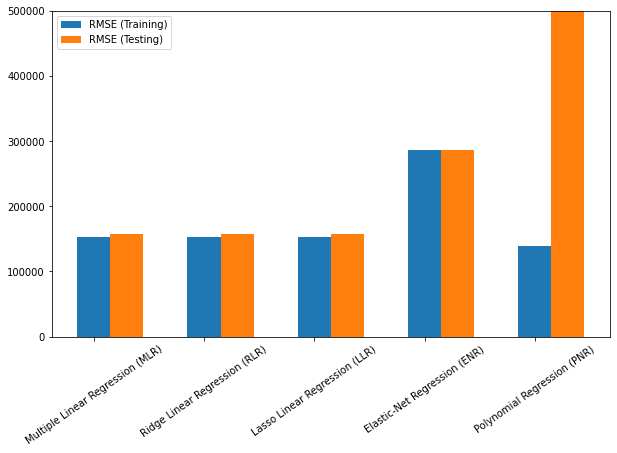

In [ ]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()

**Inference:**\
Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple Multiple Linear Regression Model gave the best results. 